In [16]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.datasets import reuters
from keras.preprocessing import sequence



In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [19]:
len(train_data)

8982

In [20]:
len(test_data)

2246

In [21]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [23]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
train_labels[10]

3

## Preparing the data

In [0]:
word_length = 700

In [0]:
train_data = sequence.pad_sequences(train_data, maxlen=word_length)
test_data = sequence.pad_sequences(test_data, maxlen=word_length)



In [0]:
from keras.utils import np_utils

train_labels = np_utils.to_categorical(train_labels, 46)
test_labels = np_utils.to_categorical(test_labels, 46)

## Building our network


## Using LSTM 

In [28]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(10000, 64))
model.add(layers.LSTM(32, input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 44s 7ms/step - loss: 2.7753 - acc: 0.3437 - val_loss: 2.3868 - val_acc: 0.3532
Epoch 2/30
6287/6287 [==============================] - 44s 7ms/step - loss: 2.2213 - acc: 0.3549 - val_loss: 2.1964 - val_acc: 0.3551
Epoch 3/30
6287/6287 [==============================] - 44s 7ms/step - loss: 1.9998 - acc: 0.4231 - val_loss: 1.9959 - val_acc: 0.4501
Epoch 4/30
6287/6287 [==============================] - 44s 7ms/step - loss: 1.8450 - acc: 0.5029 - val_loss: 1.7764 - val_acc: 0.5417
Epoch 5/30
6287/6287 [==============================] - 44s 7ms/step - loss: 1.7340 - acc: 0.5457 - val_loss: 1.7056 - val_acc: 0.5570
Epoch 6/30
6287/6287 [==============================] - 44s 7ms/step - loss: 1.6639 - acc: 0.5556 - val_loss: 2.3882 - val_acc: 0.4597
Epoch 7/30
6287/6287 [==============================] - 43s 7ms/step - loss: 1.6425 - acc: 0.5785 - val_loss: 1.7212 - val_acc: 0.5699
Epoch 8

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1518      
Total params: 653,934
Trainable params: 653,934
Non-trainable params: 0
_________________________________________________________________


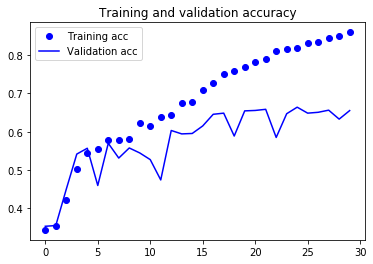

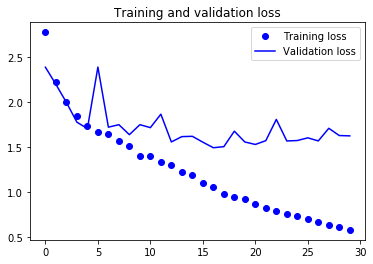

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:

model = Sequential()
model.add(Embedding(10000, 64))
model.add(layers.LSTM(32, input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs=22,
                    batch_size=128,
                    validation_split=0.3)
results = model.evaluate(test_data, test_labels)

Train on 6287 samples, validate on 2695 samples
Epoch 1/22
6287/6287 [==============================] - 44s 7ms/step - loss: 2.8156 - acc: 0.3453 - val_loss: 2.3990 - val_acc: 0.4776
Epoch 2/22
6287/6287 [==============================] - 43s 7ms/step - loss: 2.1437 - acc: 0.4784 - val_loss: 2.0844 - val_acc: 0.4635
Epoch 3/22
6287/6287 [==============================] - 43s 7ms/step - loss: 1.9790 - acc: 0.5025 - val_loss: 1.8773 - val_acc: 0.5061
Epoch 4/22
6287/6287 [==============================] - 43s 7ms/step - loss: 1.8470 - acc: 0.5153 - val_loss: 1.7866 - val_acc: 0.5217
Epoch 5/22
6287/6287 [==============================] - 43s 7ms/step - loss: 1.9921 - acc: 0.4897 - val_loss: 2.0467 - val_acc: 0.4987
Epoch 6/22
6287/6287 [==============================] - 43s 7ms/step - loss: 1.6994 - acc: 0.5411 - val_loss: 1.7817 - val_acc: 0.5232
Epoch 7/22
6287/6287 [==============================] - 43s 7ms/step - loss: 1.6164 - acc: 0.5599 - val_loss: 1.7145 - val_acc: 0.5447
Epoch 8

In [36]:
results

[1.71377689904224, 0.6006233303916316]

## Using Dropout and recurrent dropout with lstm


In [37]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

dropout_model = Sequential()
dropout_model.add(Embedding(10000, 64))
dropout_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
dropout_model.add(layers.Dense(46,activation='softmax'))

dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = dropout_model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 55s 9ms/step - loss: 2.8031 - acc: 0.3474 - val_loss: 2.4048 - val_acc: 0.3532
Epoch 2/30
6287/6287 [==============================] - 52s 8ms/step - loss: 2.3093 - acc: 0.3954 - val_loss: 2.0822 - val_acc: 0.4846
Epoch 3/30
6287/6287 [==============================] - 53s 8ms/step - loss: 2.1005 - acc: 0.4586 - val_loss: 1.9718 - val_acc: 0.4868
Epoch 4/30
6287/6287 [==============================] - 52s 8ms/step - loss: 1.9633 - acc: 0.4757 - val_loss: 1.8586 - val_acc: 0.4935
Epoch 5/30
6287/6287 [==============================] - 52s 8ms/step - loss: 1.8571 - acc: 0.4905 - val_loss: 1.7923 - val_acc: 0.5017
Epoch 6/30
6287/6287 [==============================] - 53s 8ms/step - loss: 1.7681 - acc: 0.5193 - val_loss: 1.7639 - val_acc: 0.5325
Epoch 7/30
6287/6287 [====

In [38]:
dropout_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 46)                1518      
Total params: 653,934
Trainable params: 653,934
Non-trainable params: 0
_________________________________________________________________


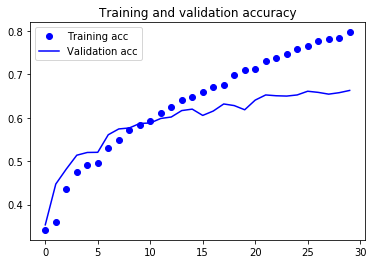

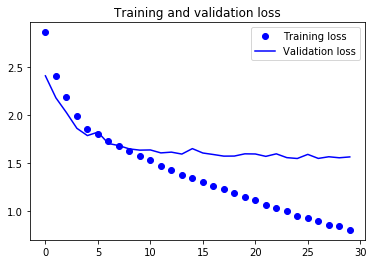

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:

dropout_model = Sequential()
dropout_model.add(Embedding(10000, 64))
dropout_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
dropout_model.add(layers.Dense(46,activation='softmax'))

dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = dropout_model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)
results = dropout_model.evaluate(test_data, test_labels)

Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 56s 9ms/step - loss: 2.7977 - acc: 0.3439 - val_loss: 2.4098 - val_acc: 0.3532
Epoch 2/30
6287/6287 [==============================] - 52s 8ms/step - loss: 2.2947 - acc: 0.3611 - val_loss: 2.1689 - val_acc: 0.3625
Epoch 3/30
6287/6287 [==============================] - 53s 8ms/step - loss: 2.0808 - acc: 0.4132 - val_loss: 1.9714 - val_acc: 0.4163
Epoch 4/30
6287/6287 [==============================] - 52s 8ms/step - loss: 1.9562 - acc: 0.4528 - val_loss: 1.8981 - val_acc: 0.4668
Epoch 5/30
6287/6287 [==============================] - 52s 8ms/step - loss: 1.8529 - acc: 0.4969 - val_loss: 1.7788 - val_acc: 0.5262
Epoch 6/30
6287/6287 [==============================] - 52s 8ms/step - loss: 1.7606 - acc: 0.5216 - val_loss: 1.7428 - val_acc: 0.5403
Epoch 7/30
6287/6287 [==============================] - 51s 8ms/step - loss: 1.6887 - acc: 0.5398 - val_loss: 1.7091 - val_acc: 0.5440
Epoch 8

In [40]:
results

[1.689304114874197, 0.6268922529471102]

## Stacking RNNs

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

stacked_rnn_model = Sequential()
stacked_rnn_model.add(Embedding(10000, 64))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
stacked_rnn_model.add(layers.Dense(46,activation='softmax'))

stacked_rnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = stacked_rnn_model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 146s 23ms/step - loss: 2.6910 - acc: 0.3437 - val_loss: 2.2521 - val_acc: 0.3558
Epoch 2/30
6287/6287 [==============================] - 140s 22ms/step - loss: 2.1081 - acc: 0.4037 - val_loss: 1.9182 - val_acc: 0.5020
Epoch 3/30
6287/6287 [==============================] - 139s 22ms/step - loss: 1.8539 - acc: 0.5082 - val_loss: 1.7554 - val_acc: 0.5414
Epoch 4/30
6287/6287 [==============================] - 141s 22ms/step - loss: 1.7447 - acc: 0.5330 - val_loss: 1.7181 - val_acc: 0.5458
Epoch 5/30
6287/6287 [==============================] - 140s 22ms/step - loss: 1.6826 - acc: 0.5371 - val_loss: 1.7373 - val_acc: 0.5325
Epoch 6/30
6287/6287 [==============================] - 140s 22ms/step - loss: 1.6319 - acc: 0.5449 - val_loss: 1.7370 - val_acc: 0.5291
Epoch 7/30
6287/6287 [==============================] - 138s 22ms/step - loss: 1.5993 - acc: 0.5556 - val_loss: 1.7399 - val_acc: 

In [0]:
stacked_rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                1518      
Total params: 670,574
Trainable params: 670,574
Non-trainable params: 0
_________________________________________________________________


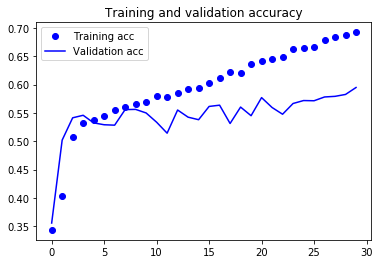

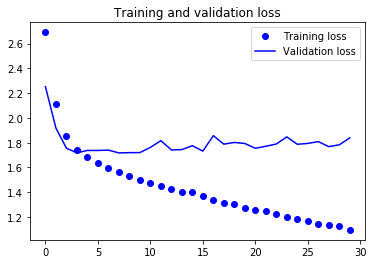

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:

stacked_rnn_model = Sequential()
stacked_rnn_model.add(Embedding(10000, 64))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
stacked_rnn_model.add(layers.Dense(46,activation='softmax'))

stacked_rnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = stacked_rnn_model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)
results = stacked_rnn_model.evaluate(test_data, test_labels)

Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 155s 25ms/step - loss: 2.7103 - acc: 0.3188 - val_loss: 2.2949 - val_acc: 0.4620
Epoch 2/30
6287/6287 [==============================] - 149s 24ms/step - loss: 2.1139 - acc: 0.4264 - val_loss: 1.8820 - val_acc: 0.5002
Epoch 3/30
6287/6287 [==============================] - 147s 23ms/step - loss: 1.8631 - acc: 0.4923 - val_loss: 1.8082 - val_acc: 0.5217
Epoch 4/30
6287/6287 [==============================] - 148s 24ms/step - loss: 1.7633 - acc: 0.5239 - val_loss: 1.7658 - val_acc: 0.5462
Epoch 5/30
6287/6287 [==============================] - 148s 24ms/step - loss: 1.6877 - acc: 0.5406 - val_loss: 1.7241 - val_acc: 0.5473
Epoch 6/30
6287/6287 [==============================] - 154s 25ms/step - loss: 1.6377 - acc: 0.5486 - val_loss: 1.7707 - val_acc: 0.5473
Epoch 7/30
6287/6287 [==============================] - 156s 25ms/step - loss: 1.5983 - acc: 0.5572 - val_loss: 1.6808 - val_acc: 

In [42]:
results

[2.0048044679001413, 0.5569902048616248]